## 1.0 Business Understanding


#### 1.1 Business Overview  
Customer churn, where subscribers discontinue services or switch to competitors, is a major challenge in the telecom industry. A [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0), published in Scientific Reports emphasizes that retaining existing customers is more cost-effective than acquiring new ones, making churn prediction a strategic priority.  

Syriatel, one of Syria’s largest telecom providers with over 6 million active customers and a 55% market share, faces rising churn despite strong coverage and service reliability. This project leverages machine learning to predict at-risk customers, enabling proactive retention strategies that improve loyalty, optimize resources, and sustain profitability.  


#### 1.2 Business Problem

Syriatel is struggling with rising customer churn, which threatens its revenue and market position. The company lacks a clear way to know customers that are likely to leave. Without timely insights, Syriatel risks losing more customers to competitors and incurring higher costs to replace them. Developing a predictive solution is critical to identify at-risk customers early and take proactive steps to retain them.  


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



#### 1.4 Success criteria:
 - A reliable classification model that can correctly predict customer churn and provide actionable insights for SyriaTel
 - The model identifies the most important features that explain why customers churn
 - The findings can be translated into clear, practical recommendations that SyriaTel can act on to reduce churn

## 2.0 Data Understanding

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).


#### 2.1 Load Dataset
1. Import libraries (pandas, numpy, matplotlib, seaborn).
2. Load dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')



In [2]:
# Load dataset 
data = pd.read_csv(r"C:/Users/user/Downloads/bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2.2 Dataset Overview

In [3]:
# Summaryinformation about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric(total minutes, charges, account length) and categorical(international plan, voicemail plan) Our Target variable is `Churn`.

In [4]:
# statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#checking the columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Check for duplicate values
data.duplicated().sum()

0

In [7]:
#checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values recorded in the dataset

In [8]:
#Checking the distribution for class imbalance
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [9]:
#checking the % of class imbalance
data['churn'].value_counts(normalize = True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

In [10]:
data= data.drop(columns=[ 'phone number', 'area code'])
data.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

## Exploratory Data Analysis

* Univariate Analysis

In [11]:
#check for unique values in the columns
data.nunique()

state                       51
account length             212
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

* Plot the unique values of the categorical variables, focusing on those with the fewest unique variables

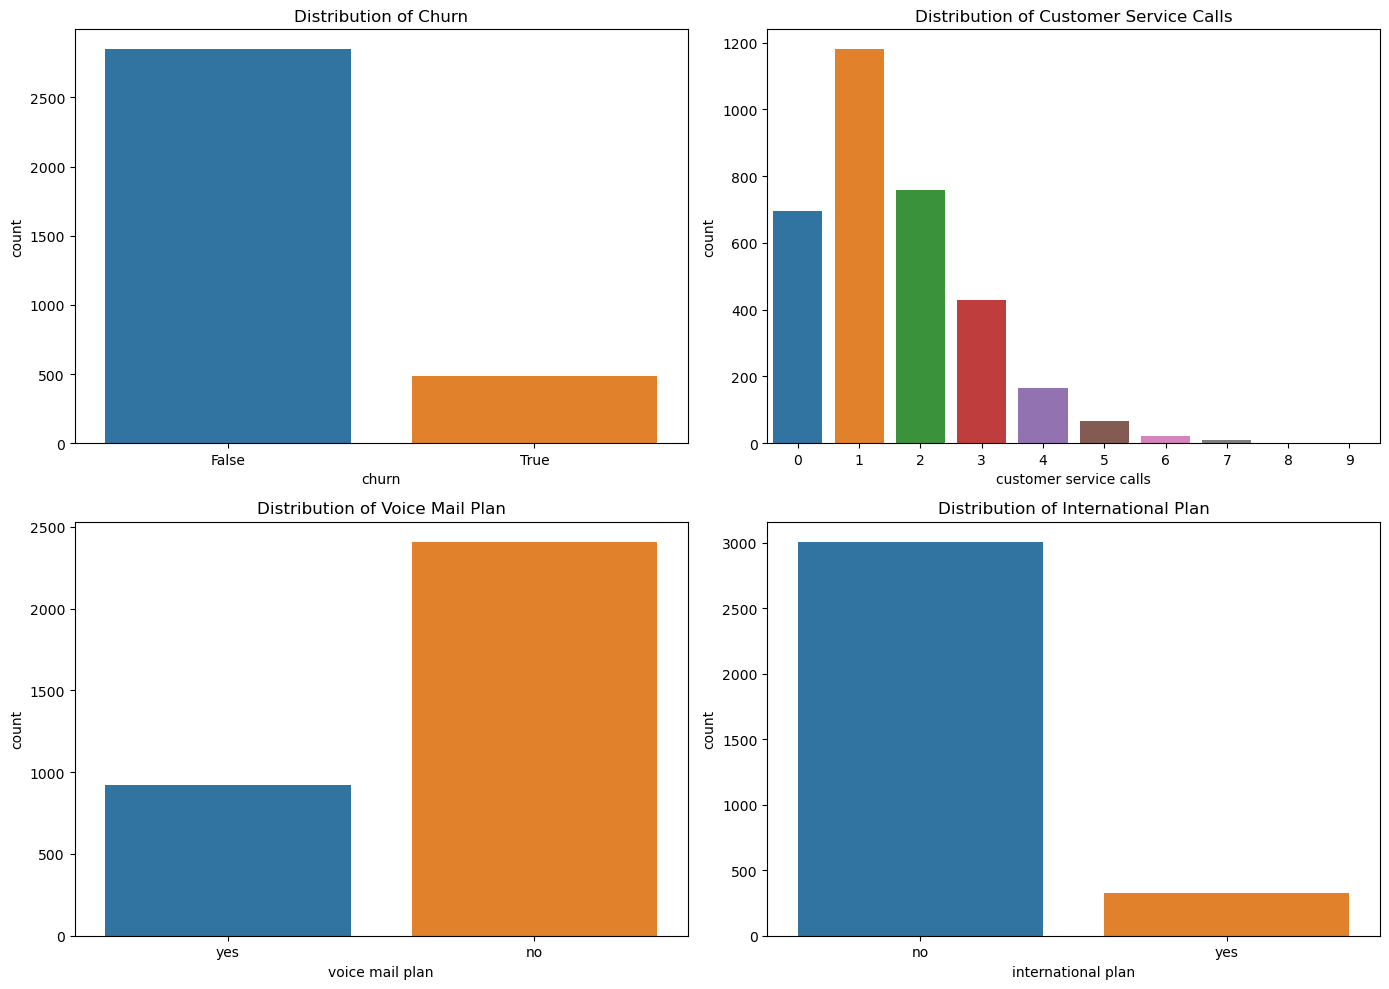

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for churn
sns.countplot(ax=axes[0, 0], x='churn', data=data)
axes[0, 0].set_title('Distribution of Churn')

# Plot for customer service calls
sns.countplot(ax=axes[0, 1], x='customer service calls', data=data)
axes[0, 1].set_title('Distribution of Customer Service Calls')

# Plot for voice mail plan
sns.countplot(ax=axes[1, 0], x='voice mail plan', data=data)
axes[1, 0].set_title('Distribution of Voice Mail Plan')

# Plot for international plan
sns.countplot(ax=axes[1, 1], x='international plan', data=data)
axes[1, 1].set_title('Distribution of International Plan')

plt.tight_layout()
plt.show()

We will convert the churn column into a binary format to align with our binary classification task. We will apply one-hot encoding to the remaining categorical variables, ensuring they are represented in binary form. To prevent multicollinearity among the features, we will drop the first dummy category of each variable

In [13]:
#One-hot-encoding the categorical columns
data = pd.get_dummies(data, columns=['international plan', 'voice mail plan'], drop_first=True, dtype=int)

#converting churn column into binary
data['churn'] = data['churn'].astype(int)

In [14]:
#checking the number of features from our dataframe
len(data.columns)-1

18

We have 19 features is very high,we will need to simplify our dataset and retain only the most relevant features, we will merge the total minutes, calls and charges into single combined columns for each category.

In [15]:
# creating new columns for total minutes, calls and charge
data['total minutes'] = data['total day minutes']+data['total eve minutes']+data['total night minutes']+data['total intl minutes']
data['total calls'] = data['total day calls']+data['total eve calls']+data['total night calls']+data['total intl calls']
data['total charge'] = data['total day charge']+data['total eve charge']+data['total night charge']+data['total intl charge']

In [16]:
#dropping the columns
data = data.drop(['total day minutes','total day calls', 'total day charge', 'total eve minutes','total eve calls', 'total eve charge', 'total night minutes','total night calls', 'total night charge', 'total intl minutes','total intl calls', 'total intl charge'], axis=1)
data.columns

Index(['state', 'account length', 'number vmail messages',
       'customer service calls', 'churn', 'international plan_yes',
       'voice mail plan_yes', 'total minutes', 'total calls', 'total charge'],
      dtype='object')

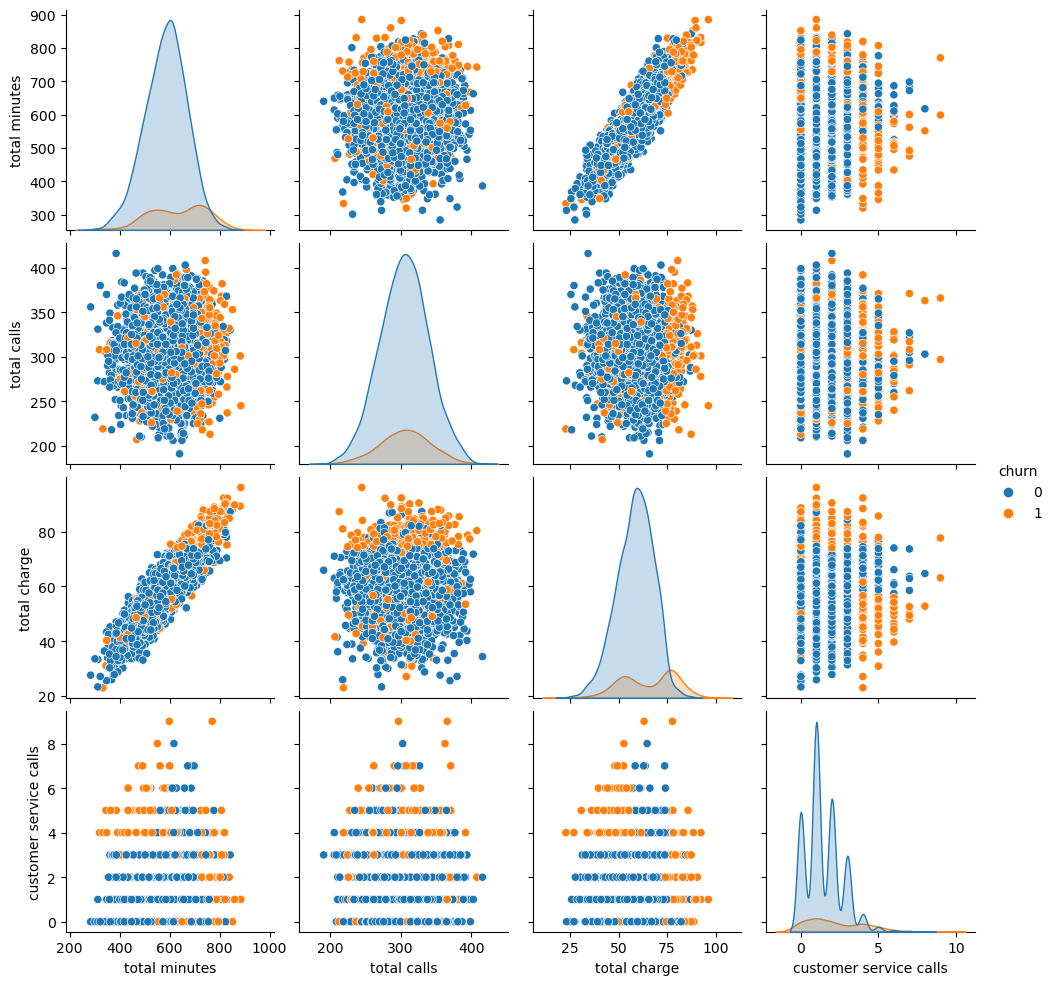

In [17]:
sns.pairplot(data[['total minutes','total calls','total charge','customer service calls','churn']], hue='churn')
plt.show()

The pairplot below shows the relationships between total minutes, total calls, total charge, and customer service calls to churn

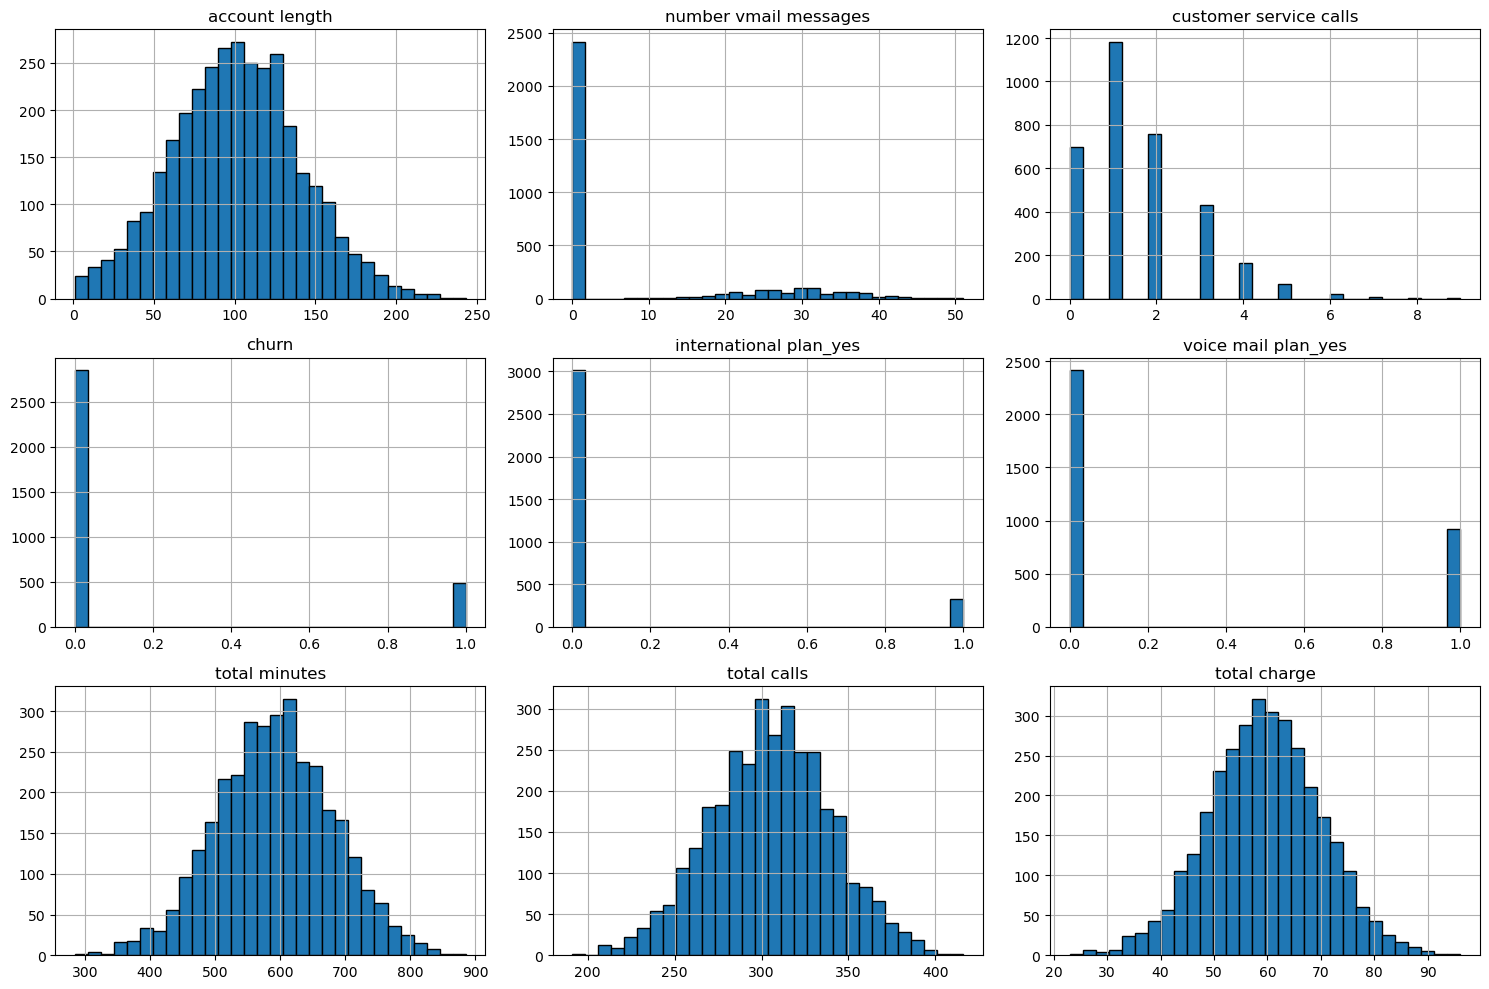

In [18]:
# Plot histograms only for numeric columns
data.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

Most features, including account length, total calls,total minutes, and total charges, show a normal distribution

**Univariate Analysis**

In [19]:
corr_matrix = data.select_dtypes(include='number').corr()
corr_matrix

,account length,number vmail messages,customer service calls,churn,international plan_yes,voice mail plan_yes,total minutes,total calls,total charge
account length,1.000000,-0.004628,-0.003796,0.016541,0.024735,0.002918,-0.004785,0.027542,0.001454
number vmail messages,-0.004628,1.000000,-0.013263,-0.089728,0.008745,0.956927,0.014779,-0.003911,0.009766
customer service calls,-0.003796,-0.013263,1.000000,0.208750,-0.024522,-0.017824,-0.020969,-0.018161,-0.019873
churn,0.016541,-0.089728,0.208750,1.000000,0.259852,-0.102148,0.198607,0.015807,0.231549
international plan_yes,0.024735,0.008745,-0.024522,0.259852,1.000000,0.006006,0.025850,0.014037,0.048415
voice mail plan_yes,0.002918,0.956927,-0.017824,-0.102148,0.006006,1.000000,0.014503,-0.000807,0.008585
total minutes,-0.004785,0.014779,-0.020969,0.198607,0.025850,0.014503,1.000000,0.018204,0.890804
total calls,0.027542,-0.003911,-0.018161,0.015807,0.014037,-0.000807,0.018204,1.000000,0.022225
total charge,0.001454,0.009766,-0.019873,0.231549,0.048415,0.008585,0.890804,0.022225,1.000000


<Axes: >

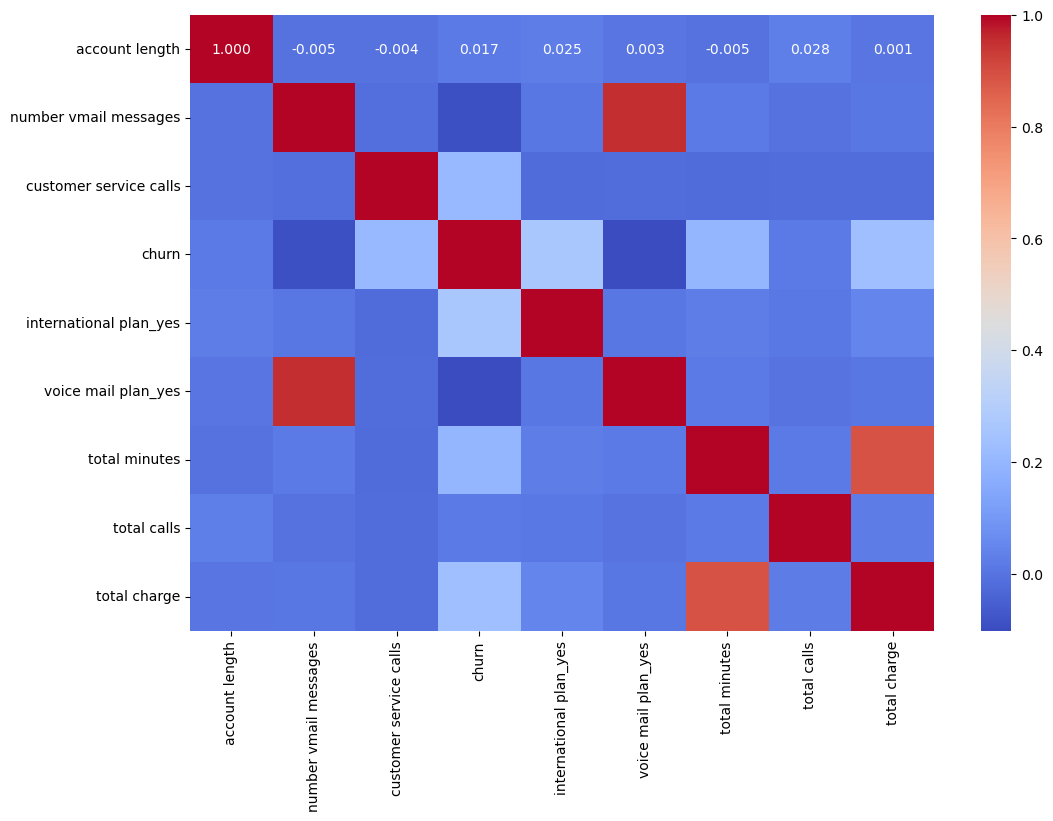

In [20]:
#Because the above data is cramped, let's visualize the same.
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.3f')

From the above we can see that their are practically no correlations between the numeric variables

We shall work with the churn column vs customer service, international plan and voice mail plan and account duration

Churn vs customer service calls

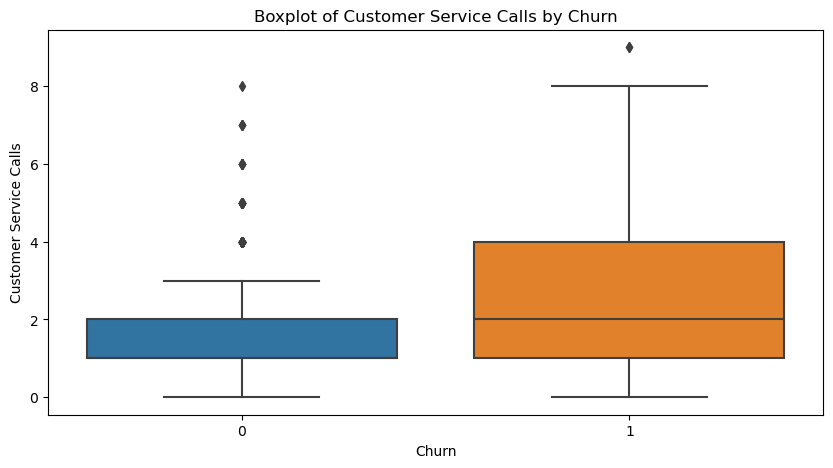

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='churn', y='customer service calls')
plt.title('Boxplot of Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

We shall work with the churn column vs customer service, international plan and voice mail plan and account duration

Churn vs customer service calls